In [2]:
import pandas as pd
import numpy as np

## 1. Make Profit Feature.
- Each registerd user rent bike for 5 USD/hour.
- Casual user rent bike for 20 USD/hour.
- Taxes 0.14%.
- Maintance 1500/year.

In [3]:
df=pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [12]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
df['datetime'].apply(lambda x: x.split('-')[0]).value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

In [14]:
df['profit']=(df['registered']*5+df['casual']*20)-0.14*(df['registered']*5+df['casual']*20)-(1500/(365*24))
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [15]:
(df[(df['datetime'].apply(lambda x: x.split('-')[0]))=='2011']['profit']).sum()-1500

5370120.575342466

In [16]:
(df[(df['datetime'].apply(lambda x: x.split('-')[0]))=='2012']['profit']).sum()-1500

8651103.683561645

## 2. Distribution rental_bikes_count & profit

In [17]:
import matplotlib.pyplot as plt

(array([2.500e+01, 1.690e+02, 9.150e+02, 2.330e+03, 3.322e+03, 2.653e+03,
        1.186e+03, 2.500e+02, 3.400e+01, 2.000e+00]),
 array([-480.8019544 , -335.36459698, -189.92723955,  -44.48988213,
         100.9474753 ,  246.38483272,  391.82219015,  537.25954758,
         682.696905  ,  828.13426243,  973.57161985]),
 <BarContainer object of 10 artists>)

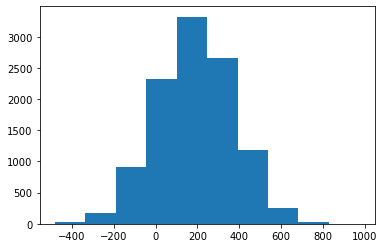

In [18]:
rented_bikes_array=np.array(df['rented_bikes_count'])

rented_bikes_count_norm=np.random.normal(rented_bikes_array.mean(),rented_bikes_array.std(),rented_bikes_array.size)
plt.hist(rented_bikes_count_norm)

## 3. Profit for each day.

In [19]:
df['day_of_month']=df['datetime'].apply(lambda x: x.split('-')[2].split()[0])
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day_of_month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,01
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,01
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,01
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,01
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,19
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,19
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,19


In [20]:
df.groupby('day_of_month').describe()['rented_bikes_count'].transpose()

day_of_month,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19
count,575.000000,573.000000,573.000000,574.000000,575.000000,572.00000,574.000000,574.000000,575.000000,572.000000,568.000000,573.000000,574.000000,574.000000,574.000000,574.000000,575.000000,563.000000,574.000000
mean,180.333913,183.910995,194.696335,195.705575,189.765217,189.86014,183.773519,179.041812,187.897391,195.183566,195.679577,190.675393,194.160279,195.829268,201.527875,191.353659,205.660870,192.605684,192.311847
std,170.449906,175.304293,182.169699,182.029979,180.372047,180.95323,175.411770,170.562395,179.950220,185.657028,187.442058,185.514903,183.380232,184.515522,185.319069,186.779789,190.984032,173.639011,180.230351
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.500000,40.000000,43.000000,46.000000,42.000000,36.75000,34.250000,41.000000,45.000000,38.000000,46.000000,39.000000,42.000000,44.250000,47.250000,38.000000,47.500000,46.000000,47.250000
50%,134.000000,144.000000,147.000000,149.000000,148.000000,141.00000,141.000000,129.500000,141.000000,149.000000,145.500000,136.000000,152.000000,151.000000,154.000000,133.000000,164.000000,149.000000,152.000000
75%,264.000000,266.000000,299.000000,298.750000,276.000000,285.50000,284.500000,269.500000,267.500000,290.250000,278.750000,285.000000,281.750000,281.000000,287.000000,283.000000,308.000000,288.500000,276.000000
max,891.000000,865.000000,917.000000,901.000000,900.000000,858.00000,869.000000,862.000000,872.000000,968.000000,970.000000,977.000000,884.000000,894.000000,851.000000,943.000000,888.000000,890.000000,892.000000


In [21]:
df.groupby('day_of_month').describe()['profit'].transpose()

day_of_month,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19
count,575.000000,573.000000,573.000000,574.000000,575.000000,572.000000,574.000000,574.000000,575.000000,572.000000,568.000000,573.000000,574.000000,574.000000,574.000000,574.000000,575.000000,563.000000,574.000000
mean,1183.084071,1234.694212,1334.832432,1381.791833,1264.784071,1256.270725,1222.137478,1200.959603,1259.691376,1316.936809,1310.988098,1251.241333,1283.880683,1302.159429,1389.657687,1288.038349,1412.733985,1310.374060,1273.707513
std,1177.332622,1271.885406,1336.400290,1375.830088,1242.544971,1314.523774,1258.343572,1257.326762,1317.474620,1308.519589,1332.755480,1278.658542,1269.464067,1344.120613,1435.207117,1355.724069,1429.769672,1282.244199,1261.826826
min,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767
25%,262.128767,232.028767,262.128767,280.403767,236.328767,218.053767,199.778767,240.628767,259.978767,214.828767,275.028767,223.428767,237.403767,281.478767,284.703767,233.103767,281.478767,305.128767,295.453767
50%,859.828767,894.228767,877.028767,879.178767,907.128767,868.428767,883.478767,773.828767,829.728767,859.828767,926.478767,877.028767,926.478767,883.478767,978.078767,827.578767,975.928767,993.128767,969.478767
75%,1704.778767,1788.628767,2076.728767,2097.153767,1872.478767,1884.303767,1918.703767,1787.553767,1859.578767,2068.128767,1871.403767,1887.528767,1856.353767,1844.528767,1946.653767,1846.678767,2093.928767,1784.328767,1912.253767
max,6269.228767,6849.728767,6501.428767,5426.428767,5908.028767,7864.528767,7344.228767,6045.628767,6656.228767,6307.928767,7034.628767,6613.228767,6531.528767,6888.428767,7881.728767,6432.628767,7679.628767,6497.128767,7795.728767


## 4. Which season that has more registeration & profit.

In [22]:
df[(df['registered']==df['registered'].max())]['season']

9345    Fall
Name: season, dtype: object

In [23]:
df[(df['profit']==df['profit'].max())]['season']

9415    Fall
Name: season, dtype: object

In [24]:
df.groupby('season').max('profit')

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
season,,,,,,,,,
Fall,1.0,1.0,41.00,100.0,56.9969,350,886,977,7881.728767
Spring,1.0,1.0,29.52,100.0,51.9987,367,681,801,7679.628767
Summer,1.0,1.0,38.54,100.0,47.9988,361,782,873,7795.728767
Winter,1.0,1.0,30.34,100.0,35.0008,362,857,948,7864.528767


## 5. Which weather condition that has more registeration & profit.

In [25]:
df.groupby('weather').max('profit')

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
weather,,,,,,,,,
Clear,1.0,1.0,41.00,100.0,51.9987,361,886,977,7795.728767
Mist,1.0,1.0,39.36,100.0,43.9989,350,788,890,7881.728767
Rainy,1.0,1.0,37.72,100.0,56.9969,249,791,891,5542.528767
Snowy,NaN,1.0,8.20,86.0,6.0032,6,158,164,782.428767


In [26]:
df.groupby('weather').max('registered')

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
weather,,,,,,,,,
Clear,1.0,1.0,41.00,100.0,51.9987,361,886,977,7795.728767
Mist,1.0,1.0,39.36,100.0,43.9989,350,788,890,7881.728767
Rainy,1.0,1.0,37.72,100.0,56.9969,249,791,891,5542.528767
Snowy,NaN,1.0,8.20,86.0,6.0032,6,158,164,782.428767


## 6. Correlation between profit & bikes count with all features.

In [27]:
df[['profit','rented_bikes_count']].corr()

,profit,rented_bikes_count
profit,1.00000,0.93449
rented_bikes_count,0.93449,1.00000


In [28]:
df.corr()[['profit','rented_bikes_count']]

,profit,rented_bikes_count
holiday,0.017410,-0.005827
workingday,-0.150218,0.010940
temp,0.462618,0.391867
humidity,-0.358150,-0.317282
windspeed,0.100205,0.097747
casual,0.902713,0.690414
registered,0.822156,0.970948
rented_bikes_count,0.934490,1.000000
profit,1.000000,0.934490


## 7. Rentals during rush hours (7-9 am & 3-5 pm).

In [29]:
def rush_hours(x):
    hour=int(x.split('-')[2].split()[1].split(':')[0])
    return (hour>=7 and hour<=9) or (hour>=15 and hour <=17)
        
df[df['datetime'].apply(rush_hours)]['rented_bikes_count']

7          3
8          8
9         14
15       110
16        93
        ... 
10870    678
10871    317
10877    237
10878    334
10879    562
Name: rented_bikes_count, Length: 2733, dtype: int64

In [30]:
df[df['datetime'].apply(rush_hours)]['profit']

7          25.628767
8          47.128767
9         163.228767
15        988.828767
16        928.628767
            ...     
10870    3082.928767
10871    1466.128767
10877    1380.128767
10878    1913.328767
10879    2751.828767
Name: profit, Length: 2733, dtype: float64

## 7. Rentals during workday & holiday.

In [31]:
df.groupby('workingday').describe()['profit'].transpose()

workingday,0.0,1.0
count,3021.000000,6367.000000
mean,1573.934792,1152.249028
std,1654.267541,1086.615292
min,4.128767,4.128767
25%,279.328767,236.328767
50%,898.528767,889.928767
75%,2493.828767,1758.528767
max,7881.728767,6338.028767


In [32]:
df.groupby('workingday').describe()['rented_bikes_count'].transpose()

workingday,0.0,1.0
count,3021.000000,6367.000000
mean,188.369083,192.613162
std,173.488936,184.815639
min,1.000000,1.000000
25%,43.000000,41.000000
50%,129.000000,150.000000
75%,304.000000,276.000000
max,783.000000,970.000000


In [33]:
df.groupby('holiday').describe()['profit'].transpose()

holiday,0.0,1.0
count,9738.000000,292.000000
mean,1284.486222,1420.316096
std,1307.803127,1431.919681
min,4.128767,8.428767
25%,249.228767,253.528767
50%,889.928767,917.878767
75%,1887.528767,2249.803767
max,7881.728767,5426.428767


In [34]:
df.groupby('holiday').describe()['rented_bikes_count'].transpose()

holiday,0.0,1.0
count,9738.000000,292.000000
mean,191.662662,185.369863
std,181.998224,166.583210
min,1.000000,2.000000
25%,41.250000,38.750000
50%,145.000000,139.000000
75%,283.000000,305.000000
max,977.000000,712.000000


## 8. Registered or casual is more.

In [38]:
df.corr()[['profit', 'rented_bikes_count']].loc[['casual', 'registered']]

,profit,rented_bikes_count
casual,0.902713,0.690414
registered,0.822156,0.970948


## 9. What is the average of bikes would be registered during the week.

In [43]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day_of_month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,01
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,01
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,01
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,01
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,19
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,19
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,19


In [44]:
df['day_of_week']=df['datetime'].dt.day_name()
df.groupby('day_of_week').mean()[['rented_bikes_count', 'profit']]

,rented_bikes_count,profit
day_of_week,,
Friday,197.844343,1250.484751
Monday,190.390716,1203.496079
Saturday,196.665404,1666.252504
Sunday,180.839772,1513.401535
Thursday,197.296201,1157.893803
Tuesday,189.723847,1112.073082
Wednesday,188.411348,1100.526188


## 10.Schools (9-12) & (2-6) profit.

In [45]:
df['month']=df['datetime'].dt.month_name()

In [48]:
def is_school_day(x):
    if x in ['September', 'October', 'November', 'December', 'February', 'March', 'April', 'May', 'June']:
        return 1
    else:
        return 0
df['is_school_day']=df['month'].apply(is_school_day)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day_of_month,day_of_week,month,is_school_day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,01,Saturday,January,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,01,Saturday,January,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,01,Saturday,January,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,01,Saturday,January,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,01,Saturday,January,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,19,Wednesday,December,1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,19,Wednesday,December,1
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,19,Wednesday,December,1
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,19,Wednesday,December,1


In [50]:
df.groupby('is_school_day').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
is_school_day,,,,,,,,
0,2708.0,1302.252401,1290.751798,4.128767,240.628767,881.328767,2038.028767,6497.128767
1,8178.0,1283.654287,1315.937715,4.128767,257.828767,894.228767,1848.828767,7881.728767


In [51]:
df.groupby('is_school_day').describe()['rented_bikes_count']

,count,mean,std,min,25%,50%,75%,max
is_school_day,,,,,,,,
0,2708.0,187.598597,179.258377,1.0,40.0,139.0,282.0,897.0
1,8178.0,192.890560,181.756401,1.0,44.0,147.0,284.0,977.0


## 11. Profit in 2011 & saturdays & season fall


In [54]:
df['year']=df['datetime'].dt.year
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day_of_month,day_of_week,month,is_school_day,year
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,01,Saturday,January,0,2011
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,01,Saturday,January,0,2011
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,01,Saturday,January,0,2011
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,01,Saturday,January,0,2011
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,01,Saturday,January,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,19,Wednesday,December,1,2012
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,19,Wednesday,December,1,2012
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,19,Wednesday,December,1,2012
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,19,Wednesday,December,1,2012


In [55]:
df[ (df['year'] == 2011) & (df['day_of_week'] == 'Saturday')  & (df['season'] == 'Fall')][['profit', 'rented_bikes_count']].sum()

profit                351695.079452
rented_bikes_count     38354.000000
dtype: float64

## Apply data analysis on 'loan_data.csv' dataset.

In [96]:
df2=pd.read_csv('loan_data.csv')

In [97]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [99]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
